In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [0]:
df_2013 = pd.read_excel('/content/drive/My Drive/DATA SCIENCE/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls',
                  header= 3)
df_2014 = pd.read_excel('/content/drive/My Drive/DATA SCIENCE/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls',
                       header=3)

In [0]:
df_2013 = df_2013.drop([0,0])



df_2013 = df_2013.fillna(0)
df_2013 = df_2013.rename(columns={'by City, 2013':'city',
                       'Unnamed: 1':'population', 
                       'Unnamed: 2':'violent_crime', 
                       'Unnamed: 3':'murder', 
                       'Unnamed: 4':'rape_def1', 
                       'Unnamed: 5':'rape_def2', 
                       'Unnamed: 6':'robbery', 
                       'Unnamed: 7':'aggravated_assault', 
                       'Unnamed: 8':'property_crime', 
                       'Unnamed: 9':'burglary', 
                       'Unnamed: 10':'larceny_theft',
                       'Unnamed: 11':'motor_theft',
                       'Unnamed: 12':'arson',
                       })

df_2014 = df_2014.drop([0,0])



df_2014 = df_2014.fillna(0)
df_2014 = df_2014.rename(columns={'by City, 2014':'city',
                       'Unnamed: 1':'population', 
                       'Unnamed: 2':'violent_crime', 
                       'Unnamed: 3':'murder', 
                       'Unnamed: 4':'rape_def1', 
                       'Unnamed: 5':'rape_def2', 
                       'Unnamed: 6':'robbery', 
                       'Unnamed: 7':'aggravated_assault', 
                       'Unnamed: 8':'property_crime', 
                       'Unnamed: 9':'burglary', 
                       'Unnamed: 10':'larceny_theft',
                       'Unnamed: 11':'motor_theft',
                       'Unnamed: 12':'arson',
                       })





In [11]:
df_2013_nocity = df_2013.drop(columns=['city'])

df_2013_nocity.head(5)

df_2014_nocity = df_2014.drop(columns=['city'])

df_2014_nocity.head(5)

,population,violent_crime,murder,rape_def1,rape_def2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_theft,arson
1,1851,0,0,0,0,0,0,11,1,10,0,0
2,2568,2,0,0,0,1,1,49,1,47,1,0
3,820,0,0,0,0,0,0,1,0,1,0,0
4,2842,1,0,0,0,0,1,17,0,17,0,0
5,98595,802,8,54,0,237,503,3888,683,3083,122,12


In [12]:
df_2013_nocity.head(5)

,population,violent_crime,murder,rape_def1,rape_def2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_theft,arson
1,1861,0,0,0,0,0,0,12,2,10,0,0
2,2577,3,0,0,0,0,3,24,3,20,1,0
3,2846,3,0,0,0,0,3,16,1,15,0,0
4,97956,791,8,0,30,227,526,4090,705,3243,142,0
5,6388,23,0,0,3,4,16,223,53,165,5,0


In [17]:


#encode robbery and murder and make new columns

df_2013_nocity['robbery_enc'] = np.where(df_2013_nocity['robbery']>0,'1','0')
df_2013_nocity['murder_enc'] = np.where(df_2013_nocity['murder']>0,'1','0')













pop = df_2013_nocity['population']
pop_sqr = pop * pop
murder = df_2013_nocity['murder_enc']
robbery = df_2013_nocity['robbery_enc']
b = 0

#property_crime = b + pop + pop_sqr + murder + robbery

df_2013_nocity.astype('int32').dtypes

df_2013_nocity.dtypes

#df_2013_nocity['robbery_enc'].head(5)

population             int64
violent_crime          int64
murder                 int64
rape_def1              int64
rape_def2              int64
robbery                int64
aggravated_assault     int64
property_crime         int64
burglary               int64
larceny_theft          int64
motor_theft            int64
arson                  int64
robbery_enc           object
murder_enc            object
dtype: object

In [0]:
x = df_2013_nocity
y = df_2013_nocity['property_crime']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(280, 12) (280,)
(71, 12) (71,)


In [0]:
lm = linear_model.LinearRegression()

model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [0]:
predictions[0:5]

array([125.,  31., 662.,  13.,  41.])

Text(0, 0.5, 'Predictions')

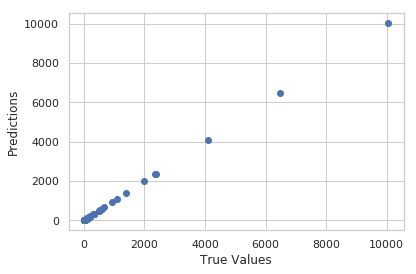

In [0]:
# 2013 plot
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [0]:
x = df_2014_nocity
y = df_2014_nocity['property_crime']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(300, 12) (300,)
(76, 12) (76,)


In [0]:
lm = linear_model.LinearRegression()

model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [0]:
predictions[0:5]

array([ 24.,  79., 506., 338.,  74.])

Text(0, 0.5, 'Predictions')

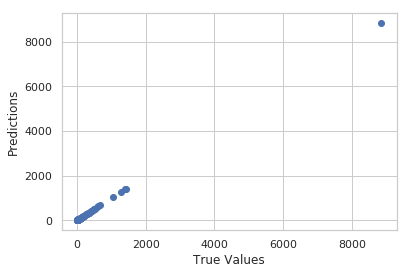

In [0]:
# 2014 plot

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')